# Notebook to run scmap on the 3 mouse atlases

## Imports

In [ ]:
library(googleVis)
library(scater)
library(SingleCellExperiment)

library(scmap)

## Dataset loading

In [ ]:
mca <- readRDS("/gpfs/gss1/work/sduknn/Andreas/TM_MCA/MCA/mca_sce.rds")
droplet <- readRDS("/gpfs/gss1/work/sduknn/Andreas/TM_MCA/TM/droplet/droplet_sce.rds")
facs <- readRDS("/gpfs/gss1/work/sduknn/Andreas/TM_MCA/TM/facs/facs_sce.rds")

## Setup objects

In [ ]:
colData(droplet)$cell_type1 <- colData(droplet)$type
colData(facs)$cell_type1 <- colData(facs)$type
colData(mca)$cell_type1 <- colData(mca)$type

In [ ]:
rowData(droplet)$feature_symbol <- rownames(droplet)
rowData(facs)$feature_symbol <- rownames(facs)
rowData(mca)$feature_symbol <- rownames(mca)

## Normalizing

In [7]:
droplet <- normalizeSCE(droplet, 
             exprs_values = "counts", 
             return_log = TRUE, 
             log_exprs_offset = NULL,
             centre_size_factors = TRUE,
             preserve_zeroes = FALSE)
facs <- normalizeSCE(facs, 
             exprs_values = "counts", 
             return_log = TRUE,
             log_exprs_offset = NULL, 
             centre_size_factors = TRUE,
             preserve_zeroes = FALSE)
mca <- normalizeSCE(mca,
             exprs_values = "counts", 
             return_log = TRUE,
             log_exprs_offset = NULL,
             centre_size_factors = TRUE,
             preserve_zeroes = FALSE)

Warning message in normalizeSCE(droplet, exprs_values = "counts", return_log = TRUE, :
“using library sizes as size factors”Warning message in normalizeSCE(facs, exprs_values = "counts", return_log = TRUE, :
“using library sizes as size factors”Warning message in normalizeSCE(mca, exprs_values = "counts", return_log = TRUE, :
“using library sizes as size factors”

## Feature selection

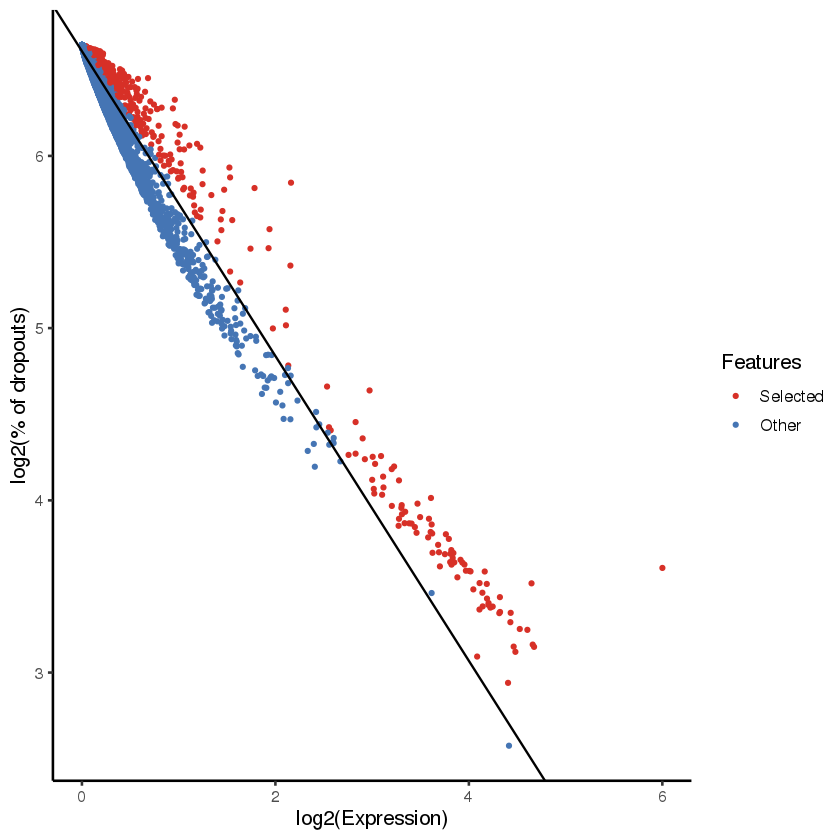

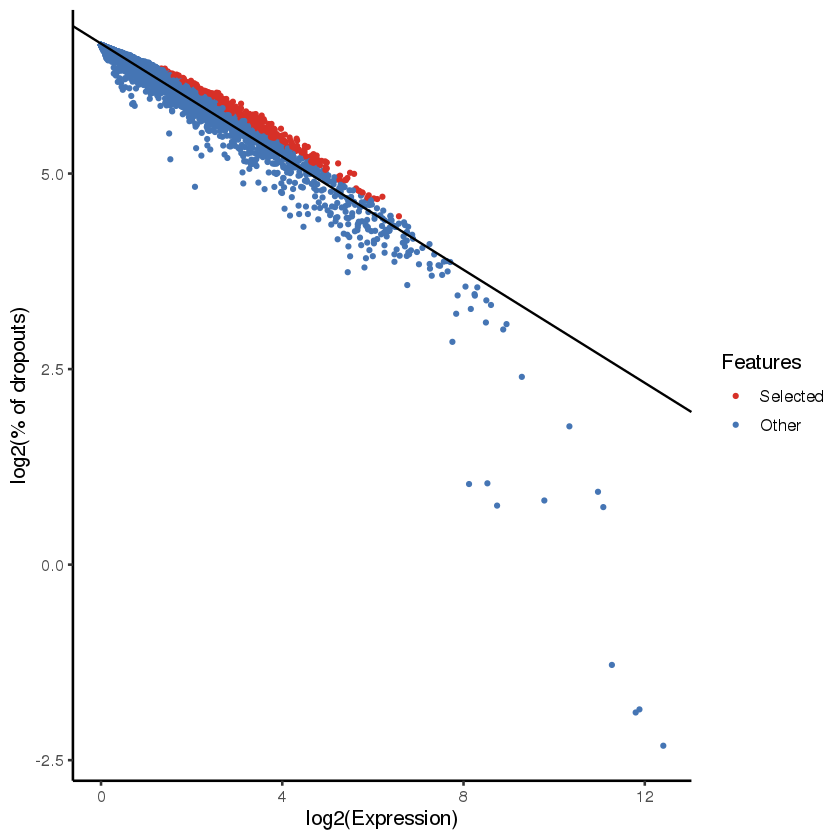

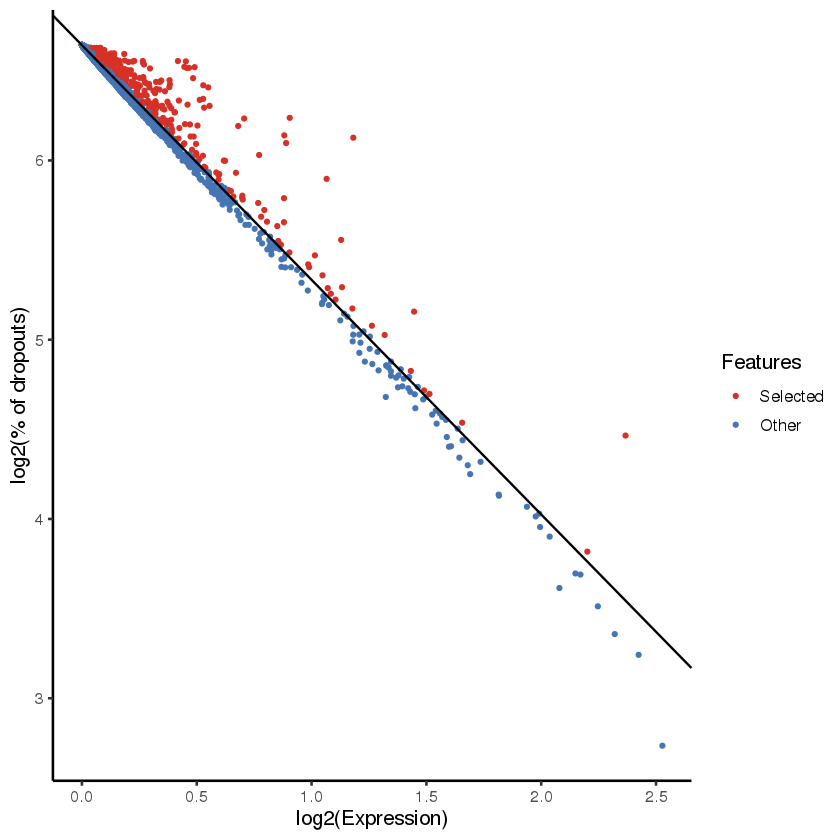

In [8]:
#select features from all datasets
droplet <- selectFeatures(droplet, suppress_plot = FALSE)
facs <- selectFeatures(facs, suppress_plot = FALSE)
mca <- selectFeatures(mca, suppress_plot = FALSE)

## scmap indexes

In [9]:
#make celltype indexes
droplet <- indexCluster(droplet)
facs <- indexCluster(facs)
mca <- indexCluster(mca)

## Projecting TM - 10X labels to TM - SS2

In [ ]:
#projecting the TM - 10X dataset to the TM - SS2 dataset
facs_to_droplet <- scmapCluster(
  projection = facs,
  index_list = list(
    droplet = metadata(droplet)$scmap_cluster_index
  )
)


In [ ]:
# Make table of mapping
table(colData(facs)$cell_type1, facs_to_droplet$scmap_cluster_labs)

### Plot sankey

In [ ]:
html <- getSankey(colData(facs)$cell_type1,  facs_to_droplet$scmap_cluster_labs[,1], plot_height=1000, plot_width = 500)

In [ ]:
cat(html$html$chart, file='facs_to_droplet_liver.html')


In [ ]:
IRdisplay::display_html(file = html)



## Projecting TM - 10X labels to MCA

In [13]:
#projecting the TM - 10X dataset to the MCA dataset
mca_to_droplet <- scmapCluster(
  projection = mca,
  index_list = list(
    droplet = metadata(droplet)$scmap_cluster_index
  )
)

Warning message in setFeatures(projection, rownames(index)):
“Features 1190002H23Rik, 2010001M09Rik, A130040M12Rik, Beta-s, Chi3l3, Faim3, Gm11428, Hbb-b2, Lect1, Mia1, Mup2, Plac9, Rps3a, Spink3 are not present in the 'SCESet' object and therefore were not set.”

In [ ]:
#projecting the TM - 10X dataset to the TM - SS2 dataset
table(colData(mca)$cell_type1, mca_to_droplet$scmap_cluster_labs)

### Plot Sankey

In [26]:
html <- getSankey(colData(mca)$cell_type1, mca_to_droplet$scmap_cluster_labs, plot_height=10000, plot_width = 500)

In [27]:
cat(html$html$chart, file='mca_to_droplet.html')

In [ ]:
IRdisplay::display_html(file = html)